In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
def readyCSVFile(RCPData):
    RCPNew = RCPData.rename({0: 'Year', 1: 'CO2 Annual Emissions(PgC/yr)',
                 2: 'Atmospheric CO2(ppm)',3: 'Ocean Surface Alkalinity(µmol/kg)',
                 4:'Surface CO3 (µmol/kg)', 5: 'Carbonate Saturation State (Ω)',
                             6 : 'Surface pH', 7 : 'Annual Alkalinity (mol/yr)',
                            8: 'Total Alkalinity Added'}, axis=1)
    RCPNew['Year'] = -1 * RCPNew['Year']
    RCPFinal = RCPNew.set_index('Year')
    return RCPFinal

In [81]:
RCP_26 = pd.read_csv('RCP_26.txt', header = None,sep = '\s+')
RCP_45 = pd.read_csv('RCP_45.txt', header = None,sep = '\s+')
RCP_60 = pd.read_csv('RCP_6.txt', header = None,sep = '\s+')
RCP_85 = pd.read_csv('RCP_85.txt', header = None,sep = '\s+')
RCP_26ALK1 = pd.read_csv('JackV1_RCP_26.txt', header = None,sep = '\s+')
RCP_45ALK1 = pd.read_csv('JackV1_RCP_45.txt', header = None,sep = '\s+')
RCP_60ALK1 = pd.read_csv('JackV1_RCP_6.txt', header = None,sep = '\s+')
RCP_85ALK1 = pd.read_csv('JackV1_RCP_85.txt', header = None,sep = '\s+')
RCP_26ALK2 = pd.read_csv('JackV2_RCP_26.txt', header = None,sep = '\s+')
RCP_45ALK2 = pd.read_csv('JackV2_RCP_45.txt', header = None,sep = '\s+')
RCP_60ALK2 = pd.read_csv('JackV2_RCP_6.txt', header = None,sep = '\s+')
RCP_85ALK2 = pd.read_csv('JackV2_RCP_85.txt', header = None,sep = '\s+')
#2nd is CO2 emissions,
#3rd is atmospheric CO2 concentrations, G
#4th is alkalinity of the surface, G
#5th is carbonate ion of the surface, (surface CO3 (µmol/kg)) G
#6th is omega at the surface G
#7th is surface pH G
#8th is annual alkalinity added
#9th is total alkalinity added
RCP_26S = readyCSVFile(RCP_26)
RCP_45S = readyCSVFile(RCP_45)
RCP_60S = readyCSVFile(RCP_60)
RCP_85S = readyCSVFile(RCP_85)
RCP_26ALK1S = readyCSVFile(RCP_26ALK1)
RCP_45ALK1S = readyCSVFile(RCP_45ALK1)
RCP_60ALK1S = readyCSVFile(RCP_60ALK1)
RCP_85ALK1S = readyCSVFile(RCP_85ALK1)
RCP_26ALK2S = readyCSVFile(RCP_26ALK2)
RCP_45ALK2S = readyCSVFile(RCP_45ALK2)
RCP_60ALK2S = readyCSVFile(RCP_60ALK2)
RCP_85ALK2S = readyCSVFile(RCP_85ALK2)
RCPSet = (RCP_26, RCP_45, RCP_60, RCP_85, RCP_26ALK1S, RCP_45ALK1S, RCP_60ALK1S, RCP_85ALK1S)

#for i in range (0,len(RCPSet)):
#    RCPSet[i] = readyCSVFile(RCPSet[i])

In [76]:
RCP_26ALK1S['Surface pH']

Year
1980    8.14703
1981    8.14497
1982    8.14274
1983    8.14042
1984    8.13803
         ...   
4996    8.14952
4997    8.14952
4998    8.14952
4999    8.14951
5000    8.14951
Name: Surface pH, Length: 3021, dtype: float64

In [88]:
def plotAllDataOfType(axis,typeName,includeRCP, includeALK1, includeALK2):
    if(includeALK1):
        axis.plot(RCP_26ALK1S[typeName], label ='ALKS1 2.6')
        axis.plot(RCP_45ALK1S[typeName], label ='ALKS1 4.5')
        axis.plot(RCP_60ALK1S[typeName], label ='ALKS1 6.0')
        axis.plot(RCP_85ALK1S[typeName], label ='ALKS1 8.5')
    if(includeALK2):
        axis.plot(RCP_26ALK2S[typeName], label ='ALKS2 2.6')
        axis.plot(RCP_45ALK2S[typeName], label ='ALKS2 4.5')
        axis.plot(RCP_60ALK2S[typeName], label ='ALKS2 6.0')
        axis.plot(RCP_85ALK2S[typeName], label ='ALKS2 8.5')

    if(includeRCP):
        axis.plot(RCP_26S[typeName], label ='Default 2.6')
        axis.plot(RCP_45S[typeName], label ='Default 4.5')
        axis.plot(RCP_60S[typeName], label ='Default 6.0')
        axis.plot(RCP_85S[typeName], label ='Default 8.5')
        axis.set_title(typeName + ' For Default RCP and Alk Scenarios', fontsize = 25)
        axis.set_ylabel(typeName, fontsize = 15)
        return
    axis.set_title(typeName + ' For Alk Scenarios', fontsize = 25)
    axis.set_ylabel(typeName, fontsize = 15)
def plotOneValue4Data(axis,typeName,includeRCP,includeALK1,includeALK2):
    
    if(includeALK1):
        axis.plot(RCP_26ALK1S[typeName], label ='ALKS1')

    if(includeALK2):
        axis.plot(RCP_26ALK2S[typeName], label ='ALKS2')


    if(includeRCP):
        axis.plot(RCP_26S[typeName], label ='Default 2.6')
        axis.set_title(typeName + ' For Default RCP and Alk Scenarios', fontsize = 25)
        axis.set_ylabel(typeName, fontsize = 15)
        return
    axis.set_title(typeName + ' For Alk Scenarios', fontsize = 25)
    axis.set_ylabel(typeName, fontsize = 15)

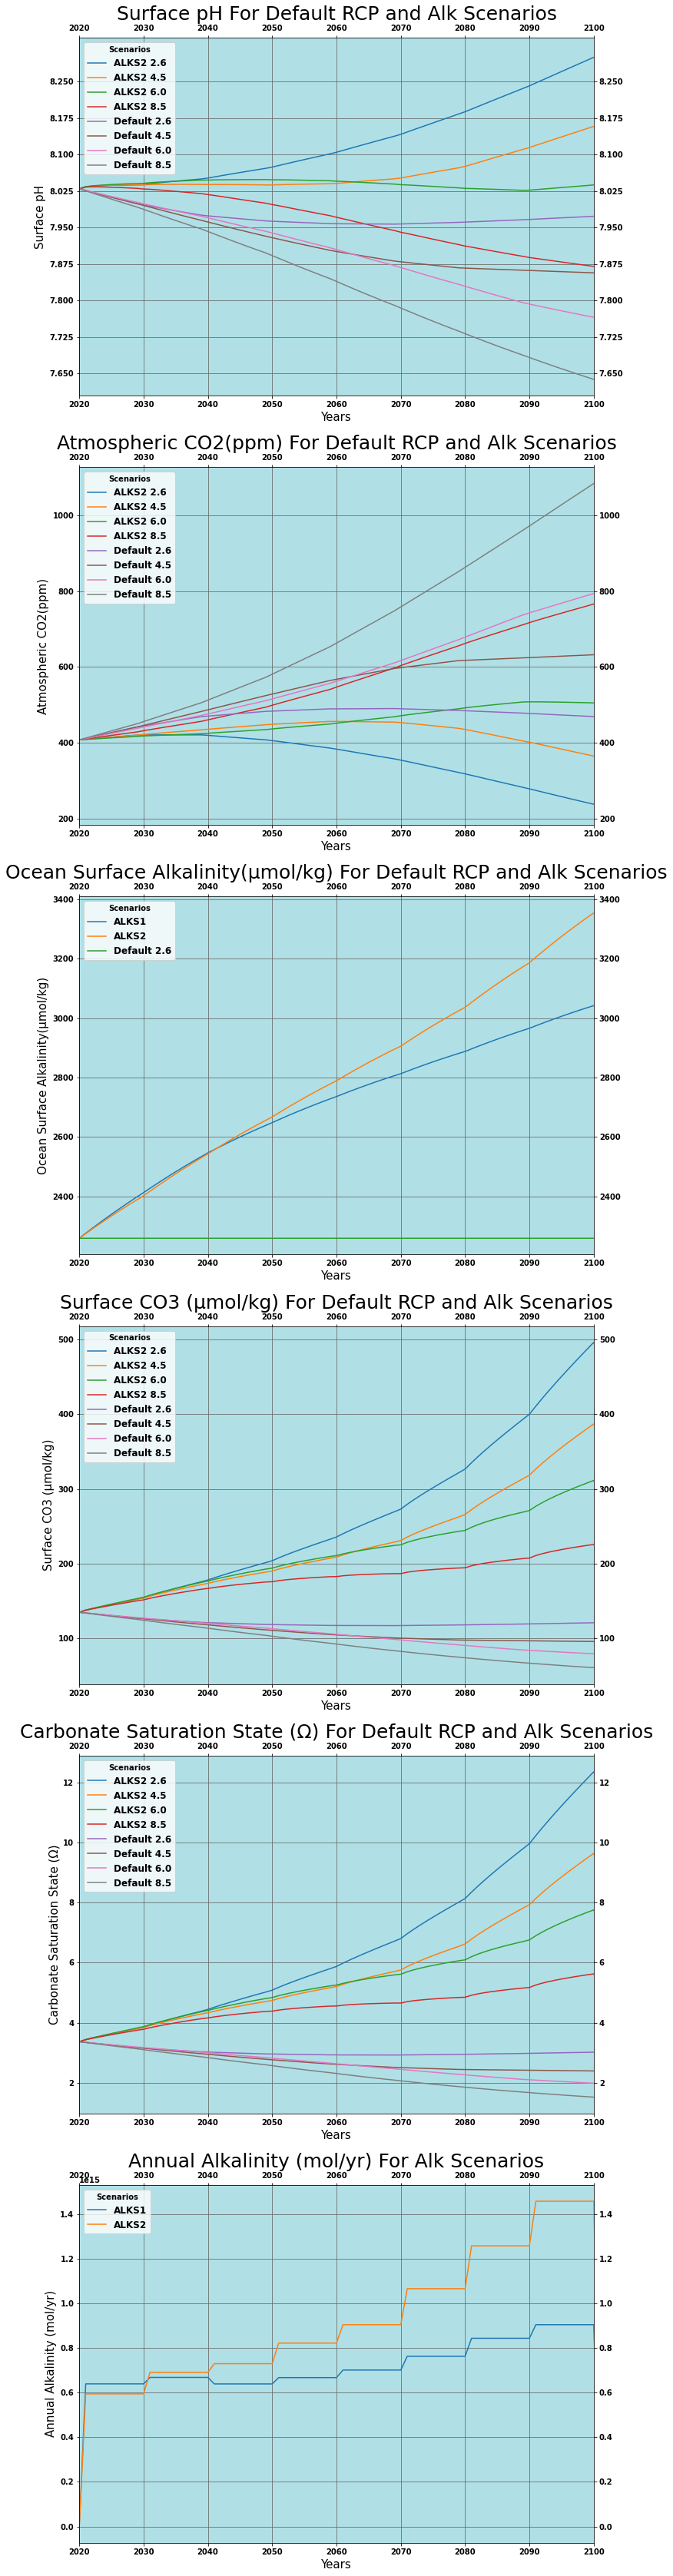

In [91]:
f, ax = plt.subplots(6, figsize = (12,60))
plt.rcParams['font.weight'] = 'bold'
#for i in  ax:
#    i.set_xticks(np.arange(1980, 2110, step=10))
#    
#    i.set_xlim(2020,2100)
#    i.grid(color = 'dimgray', b = True, which = 'both')
#    i.set_facecolor('powderblue')
#    i.set_xlabel('Years', fontsize = 15)
#    i.legend(title = "RCP Values", fontsize = 12)
#    i.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

#ax[0].plot(RCP_26S['Surface pH'], label ='Default 2.6')
#ax[0].plot(RCP_45S['Surface pH'], label ='Default 4.5')
#ax[0].plot(RCP_60S['Surface pH'], label ='Default 6.0')
#ax[0].plot(RCP_85S['Surface pH'], label ='Default 8.5')
#ax[0].plot(RCP_26ALK1S['Surface pH'], label ='ALKS1 2.6')
#ax[0].plot(RCP_45ALK1S['Surface pH'], label ='ALKS1 4.5')
#ax[0].plot(RCP_60ALK1S['Surface pH'], label ='ALKS1 6.0')
#ax[0].plot(RCP_85ALK1S['Surface pH'], label ='ALKS1 8.5')
ax[0].set_yticks(np.arange(7.5,8.3, step = .075))
#ax[0].set_title('Surface pH for Default RCP and Alk1 Scenarios', fontsize = 25)
#ax[0].set_ylabel('Surface pH', fontsize = 15)
#ax[1].plot(RCP_26S['Surface pH'], label ='Default 2.6')
#ax[1].plot(RCP_45S['Surface pH'], label ='Default 4.5')
#ax[1].plot(RCP_60S['Surface pH'], label ='Default 6.0')
#ax[1].plot(RCP_85S['Surface pH'], label ='Default 8.5')
#ax[1].plot(RCP_26ALK1S['Surface pH'], label ='ALKS1 2.6')
#ax[1].plot(RCP_45ALK1S['Surface pH'], label ='ALKS1 4.5')
#ax[1].plot(RCP_60ALK1S['Surface pH'], label ='ALKS1 6.0')
#ax[1].plot(RCP_85ALK1S['Surface pH'], label ='ALKS1 8.5')
#ax[1].set_yticks(np.arange(7.5,8.3, step = .075))
#ax[1].set_title('Surface pH for Default RCP and Alk1 Scenarios', fontsize = 25)
#ax[1].set_ylabel('Surface pH', fontsize = 15)
#plotAllDataOfType(ax[0],'Surface pH', True, True, True)
#plotAllDataOfType(ax[1],'Atmospheric CO2(ppm)', True, True, True)
#plotAllDataOfType(ax[2],'Ocean Surface Alkalinity(µmol/kg)', True, True, True)
#plotAllDataOfType(ax[3],'Surface CO3 (µmol/kg)', True, True, True)
#plotAllDataOfType(ax[4],'Carbonate Saturation State (Ω)', True, True, True)
#plotAllDataOfType(ax[5],'Annual Alkalinity (mol/yr)', False, True, True)
plotAllDataOfType(ax[0],'Surface pH', True, False, True)
plotAllDataOfType(ax[1],'Atmospheric CO2(ppm)', True, False, True)
plotOneValue4Data(ax[2],'Ocean Surface Alkalinity(µmol/kg)', True, True, True)
plotAllDataOfType(ax[3],'Surface CO3 (µmol/kg)', True, False, True)
plotAllDataOfType(ax[4],'Carbonate Saturation State (Ω)', True, False, True)
plotOneValue4Data(ax[5],'Annual Alkalinity (mol/yr)', False, True, True)

for i in  ax:
    i.set_xticks(np.arange(1980, 2110, step=10))
    
    i.set_xlim(2020,2100)
    i.grid(color = 'dimgray', b = True, which = 'both')
    i.set_facecolor('powderblue')
    i.set_xlabel('Years', fontsize = 15)
    i.legend(title = "Scenarios", fontsize = 12)
    i.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
    i.tick_params(axis="y", left=True, right=True, labelright=True, labelleft=True)

#ax.set_xticks(np.arange(2020, 2110, step=10))
#ax.set_yticks(np.arange(1, 4.5, step=1/3))

#ax.set_xlim(2020,2100)
#ax.grid(color = 'dimgray', b = True, which = 'both')

#ax.set_facecolor('powderblue')
#ax.plot(dataPlot, color = c, label = name)
#plotdata(ax,AllRCPOmegaRe['2.6'], '2.6', 'red')
#plotdata(ax,AllRCPOmegaRe['4.5'], '4.5', 'orange')
#plotdata(ax,AllRCPOmegaRe['6.0'], '6.0', 'green')
#plotdata(ax,AllRCPOmegaRe['8.5'], '8.5', 'blue')
#ax.set_title('Carbonate Saturation State (Ω), 2020-2100', fontsize = 25)
#ax.set_ylabel('Carbonate Saturation State (Ω)', fontsize = 15)
#ax.set_xlabel('Years', fontsize = 15)
#ax.legend(title = "RCP Values", fontsize = 12)
#ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

In [95]:
RCP_26ALK1S.loc[2100,'Total Alkalinity Added']


5.82259e+16

In [96]:
RCP_26ALK2S.loc[2100,'Total Alkalinity Added']

7.51901e+16